In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
import scienceplots
from scipy.interpolate import interp1d

plt.style.use(['science', 'bright', 'vpedre'])

In [2]:
deltalna = 7.5e-4
lna_start = -5
lna_end = 0.25
N = int((lna_end - lna_start) / deltalna) + 1

lna_smg =   np.linspace(lna_start, lna_end, N)
DeltaM2 =   np.linspace(1e-4, 1e-4, N)
Dkin =      np.linspace(1e-4, 1e-4, N)
cs2 =       np.linspace(1., 1., N)

# Stack the arrays column-wise and save
data = np.column_stack((lna_smg, DeltaM2, Dkin, cs2))
np.savetxt("../stable_params_input/gr.dat", data, delimiter=" ")

In [3]:
kk = np.geomspace(1e2, 10, num=3)

In [4]:
lcdm = {
    # Reference Cosmology from EuclidEmuII
    'H0'      : 67,
    'Omega_b' : 0.049,
    'Omega_cdm' : 0.27,

    'A_s' : 2.1e-9,
    'n_s' : 0.96,
    'alpha_s' : 0,
    'k_pivot' : 0.05,

    'output':'tCl mPk dTk vTk',
    'z_max_pk': 3,
}

w0wa_class = {
    'H0'      : 67,
    'Omega_b' : 0.049,
    'Omega_cdm' : 0.27,

    'A_s' : 2.1e-9,
    'n_s' : 0.96,
    'alpha_s' : 0,
    'k_pivot' : 0.05,

    'output':'tCl mPk dTk vTk',
    'z_max_pk': 3,
    # Disable cosmological constant 
    'Omega_Lambda': 0,
    # Dark energy fluid parameters
    'w0_fld' : -1.,
    'wa_fld' : 0.,
    'cs2_fld':1.,
}

w0wa_mochi = {
    'H0'      : 67,
    'Omega_b' : 0.049,
    'Omega_cdm' : 0.27,

    'A_s' : 2.1e-9,
    'n_s' : 0.96,
    'alpha_s' : 0,
    'k_pivot' : 0.05,

    'output':'tCl mPk dTk vTk',
    'z_max_pk': 3,
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'root': 'output/w0wa_mochi',
    'gravity_model': 'stable_params',
    'smg_file_name': '../stable_params_input/gr.dat',
    'parameters_smg': '1e-10',
    'expansion_model': 'w0wa',
    'expansion_smg': '0.67, -1., 0.', #Lambda, w0, wa
    # CLASS evolver
    'method_qs_smg': 'automatic',
    'method_gr_smg': 'on',
    'z_gr_smg': 99.,
}



fr_hs = {
    'H0'      : 67,
    'Omega_b' : 0.049,
    'Omega_cdm' : 0.27,

    'A_s' : 2.1e-9,
    'n_s' : 0.96,
    'alpha_s' : 0,
    'k_pivot' : 0.05,

    'output':'tCl mPk dTk vTk',
    'z_max_pk': 3,
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'gravity_model': 'stable_params',
    'smg_file_name': '../stable_params_input/hs_fr_stable_params_fr0_1em4_n_1_mathematica.dat',
    'parameters_smg': '6.061178756035e-5',
    'expansion_model': 'rho_de',
    'expansion_smg': 0.5, #this value will be overwritten using the closure equation.
    'expansion_file_name' : '../stable_params_input/rho_de_stable_hs_fr_n_1_fr0_1em4_mathematica.dat',
    # CLASS evolver
    'method_qs_smg': 'automatic',
    'method_gr_smg': 'on',
    'z_gr_smg': 99.,
}


In [ ]:
models = [('lcdm', lcdm), ('w0wa_class', w0wa_class),('w0wa_mochi', w0wa_mochi)]

cosmo = {}
rslts = {}
for name, M in models:
    print(f'\rCompuing model: {name}', end='', flush=True)
    cosmo[name] = Class()
    cosmo[name].set(M)
    cosmo[name].compute()
    rslts[name] = cosmo[name].get_background(), cosmo[name].get_perturbations()


Compuing model: w0wa_class

In [13]:
lcdm_bk_a = 1/(1+ rslts['lcdm'][0]['z'])
w0wac_bk_a= 1/(1+ rslts['w0wa_class'][0]['z'])
w0wam_bk_a= 1/(1+ rslts['w0wa_mochi'][0]['z'])

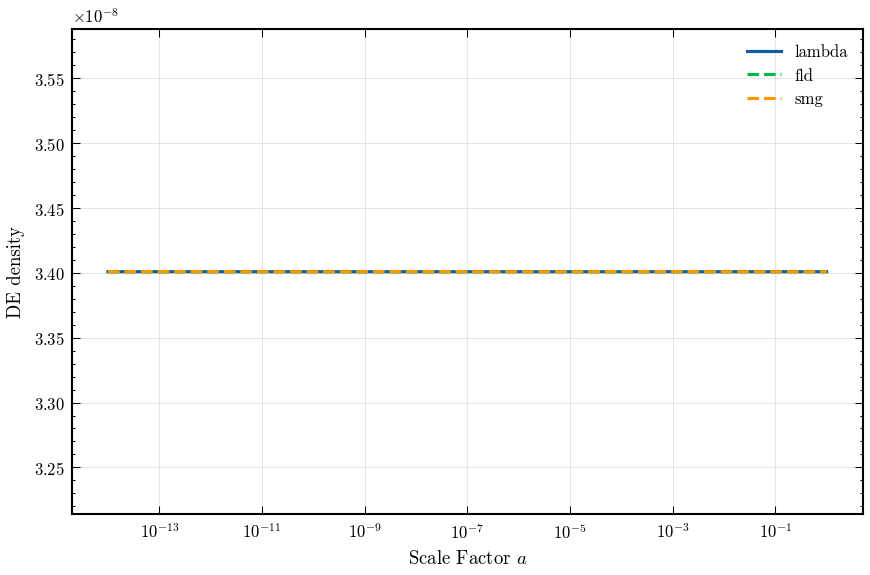

In [14]:
fig, ax = plt.subplots()

ax.semilogx(lcdm_bk_a,  rslts['lcdm'][0]['(.)rho_lambda'], label='lambda')
ax.semilogx(w0wac_bk_a, rslts['w0wa_class'][0]['(.)rho_fld'], '--',label='fld')
ax.semilogx(w0wam_bk_a, rslts['w0wa_mochi'][0]['(.)rho_smg'], '--',label='smg')

# ax.invert_xaxis()
ax.set_ylabel('DE density')
ax.set_xlabel('Scale Factor $a$')
ax.legend()


KeyError: 0

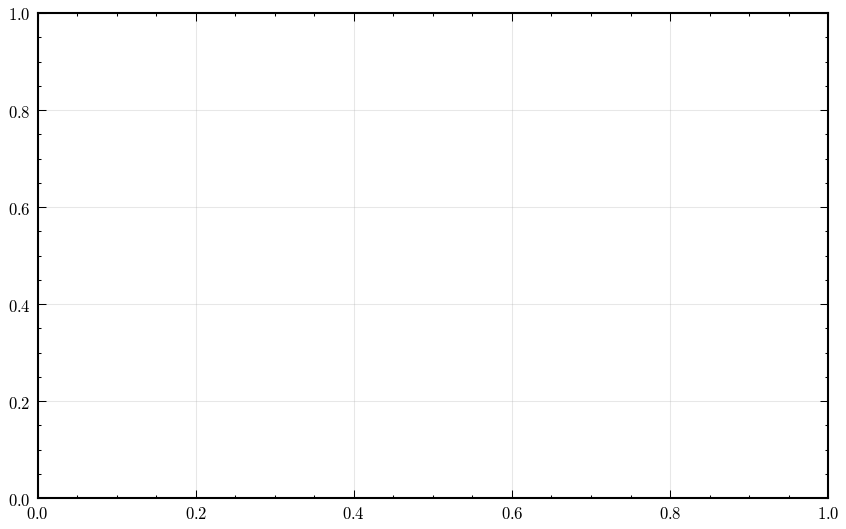

In [15]:
k_idx = 0

fig, ax = plt.subplots()

ax.semilogx(rslts['w0wa_mochi'][1][k_idx]['a'], rslts['w0wa_mochi'][1][k_idx]['delta_smg'])
ax.semilogx(rslts['w0wa_mochi'][1][k_idx]['a'], rslts['w0wa_mochi'][1][k_idx]['theta_smg'])
ax.semilogx(rslts['w0wa_mochi'][1][k_idx]['a'], rslts['w0wa_mochi'][1][k_idx]['shear_smg'])

In [29]:
rslts['w0wa_class'][1][k_idx].keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_rho_fld', 'rho_plus_p_theta_fld', 'delta_p_fld', 'h_prime', 'h_prime_prime', 'eta', 'eta_prime', 'alpha', 'alpha_prime', 'einstein00'])

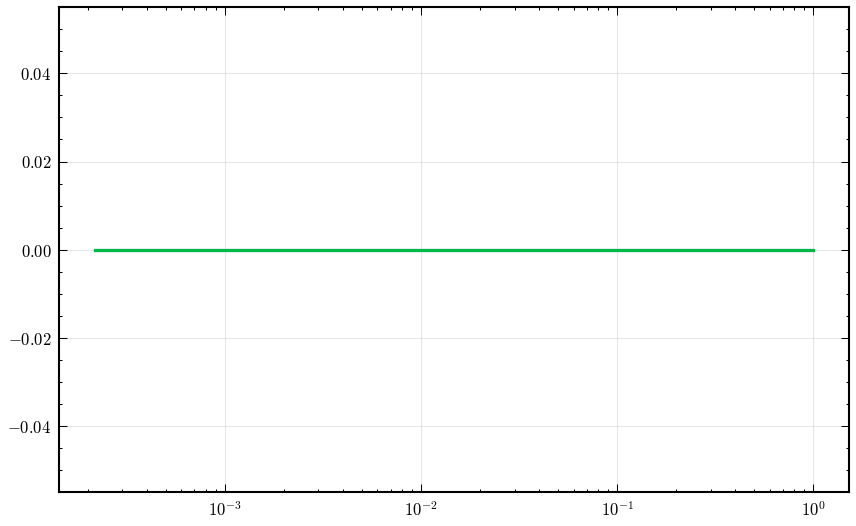

In [30]:
k_idx = 0

fig, ax = plt.subplots()

ax.semilogx(rslts['w0wa_class'][1][k_idx]['a'], rslts['w0wa_class'][1][k_idx]['delta_rho_fld'])
ax.semilogx(rslts['w0wa_class'][1][k_idx]['a'], rslts['w0wa_class'][1][k_idx]['rho_plus_p_theta_fld'])

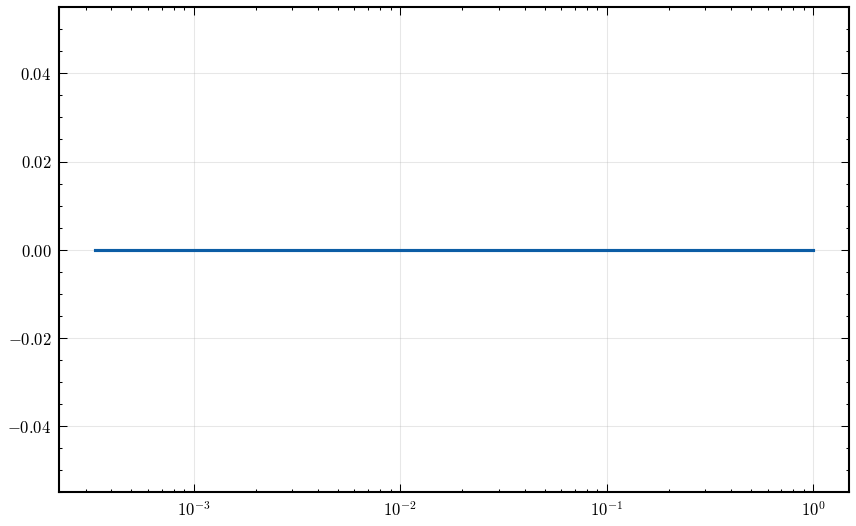

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(w0wac_pt[0]['a'], w0wac_pt[0]['theta_fld'])